In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [32]:
x = np.linspace(-np.pi, np.pi, 256, endpoint = True)
c,s = np.cos(x), np.sin(x)

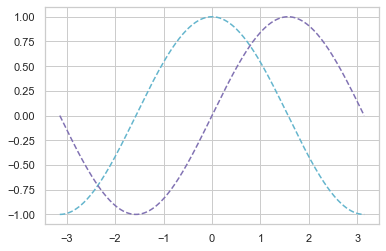

In [33]:
#plot x,c
plt.plot(x,c, '--c') #solid line w cyan color, same as color = "cyan", linestyle = "-"
plt.plot(x,s,'--m') # dashed line w magenta color

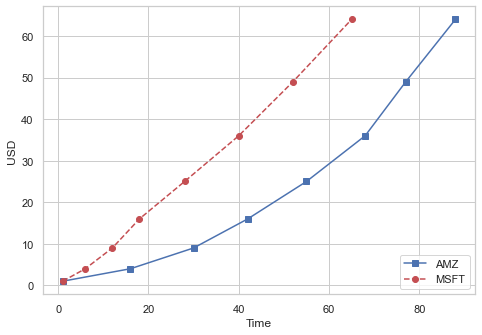

In [34]:
fig = plt.figure() #initialize a figure

#add Axes to the figure
ax = fig.add_axes([0,0,1,1])

y = [1,4,9,16,25,36,49,64]
x1 = [1,16,30,42,55,68,77,88] # AMZ
x2 = [1,6,12,18,28,40,52,65] #MSFT

l1 = ax.plot(x1, y, 'bs-') #solif line w blue color & square marker
l2 = ax.plot(x2, y, 'ro--') #dash line with red color and circle marker

ax.legend(labels=('AMZ', 'MSFT'), loc = 'lower right')
ax.set_xlabel('Time')
ax.set_ylabel('USD')
plt.show()

<AxesSubplot:>

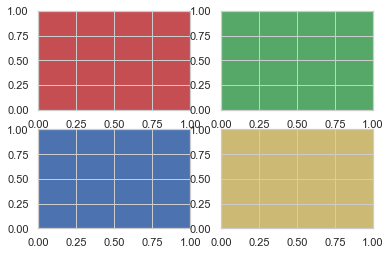

In [35]:
plt.subplot(2,2,1, fc = 'r') #row, col, posision, 
plt.subplot(2,2,2, fc = 'g')
plt.subplot(2,2,3, fc = 'b')
plt.subplot(2,2,4, fc = 'y')

# Note that creating a subplot will delete any pre-existing subplot that overlaps with it
# beyond sharing a boundary. To avoid overlap behavior, use add_subplot() instead.

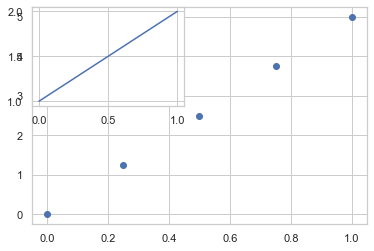

In [36]:
#create figure
fig1 = plt.figure()

#set up axes
ax1 = fig1.add_subplot(1,1,1) #bigger one
ax2 = fig1.add_subplot(2,2,1) #smaller one

#scatter the data
ax1.scatter(np.linspace(0,1,5), np.linspace(0,5,5))
ax2.plot([1,2])

plt.show()

# We have what we expected, but the scale on the left side is kind of messy since it shared
# the same line.

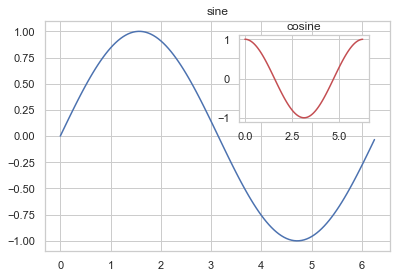

In [37]:
x = np.arange(0, np.pi*2, 0.05)
y = np.sin(x)
z = np.cos(x)

#create a figure
fig2 = plt.figure()

axes1 = fig2.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig2.add_axes([0.55, 0.55, 0.3, 0.3])

#plotting
axes1.plot(x,y,'b')
axes2.plot(x,z,'r')
axes1.set_title('sine')
axes2.set_title('cosine')

plt.show()


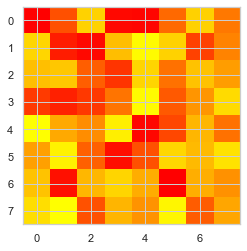

In [38]:
a = np.random.random((8,8))

plt.imshow(a, cmap= 'autumn')

plt.show()

<ipython-input-39-3004586a9c58>:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C= plt.contour(X,Y, f(X,Y), 8, colors= 'black', linewidth= .5)


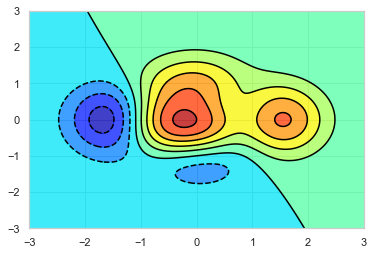

In [39]:
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X,Y, f(X,Y), 8, alpha= .75, cmap='jet')
C= plt.contour(X,Y, f(X,Y), 8, colors= 'black', linewidth= .5)
plt.show()

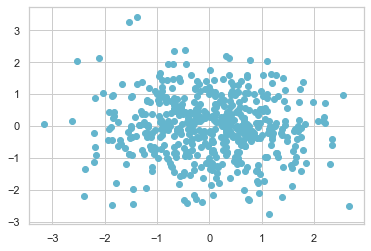

In [40]:
n = 512
x = np.random.normal(0,1,n)
y = np.random.normal(0,1,n)

plt.scatter(x,y, color = 'c')

plt.show()

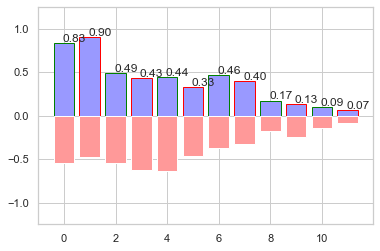

In [41]:
n = 12
x = np.arange(n)
y1 = (1-x/float(n)) * np.random.uniform(0.5, 1.0, n)
y2 = (1-x/float(n)) * np.random.uniform(0.5,1.0, n)

plt.bar(x, +y1, facecolor = '#9999ff', edgecolor = ['green', 'red'])
plt.bar(x, -y2, facecolor = '#ff9999', edgecolor = 'white')

for x,y in zip(x, y1):
    #text properties and layout
    plt.text(x+0.4, y+0.05, f"{ y:.2f}", ha= 'center', va= 'center')
    
plt.ylim(-1.25, + 1.25)
plt.show()

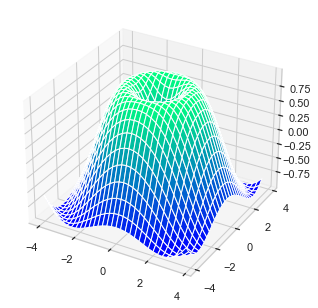

In [42]:
#3D plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x = np.arange(-4, 4, 0.25)
y = np.arange(-4,4,0.25)

#meshgrid returns coordinate matrices from coordinate vectors
x,y = np.meshgrid(x,y)
r = np.sqrt(x**2 + y **2)
z = np.sin(r)

ax.plot_surface(x,y,z, rstride=1, cstride = 1, cmap = 'winter')

plt.show()

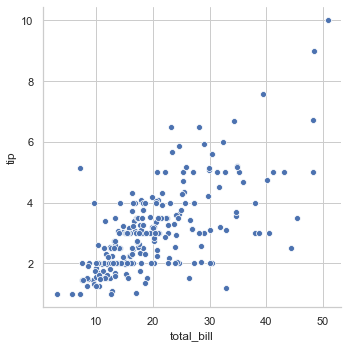

In [44]:
#load tips dataset from seaborn
df = sb.load_dataset('tips')
sb.relplot(x = "total_bill", y = "tip", data = df)

#scatter is default

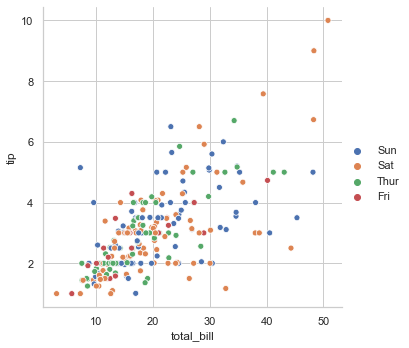

In [46]:
sb.relplot(x = "total_bill", y = "tip", hue=df.day.tolist(), data = df)

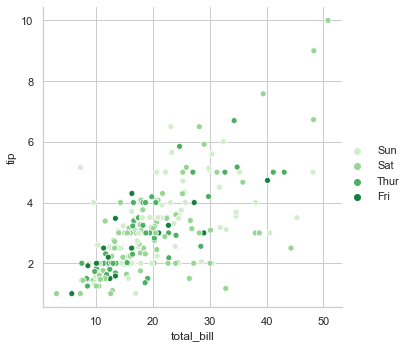

In [47]:
sb.set(style='whitegrid')
sb.relplot(x='total_bill', y='tip',hue=df.day.tolist(), palette="Greens", data=df)

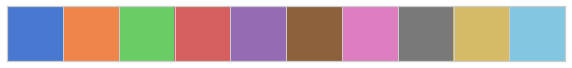

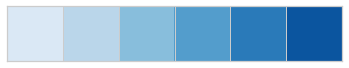

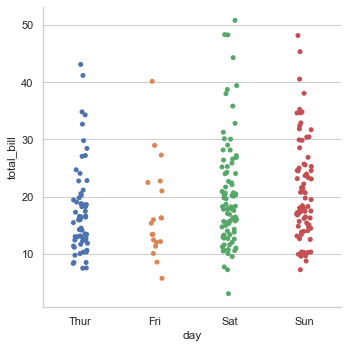

In [48]:
sb.palplot(sb.color_palette("muted"))
sb.palplot(sb.color_palette("Blues"))
sb.catplot(x="day",y="total_bill",data=df)

<AxesSubplot:>

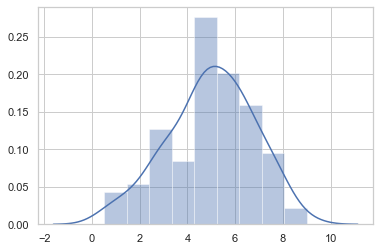

In [49]:
dist=np.random.normal(loc=5, size=100, scale=2)
sb.distplot(dist)

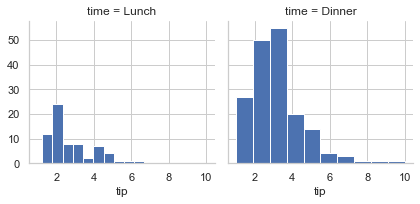

In [50]:
fg=sb.FacetGrid(df, col='time')
fg.map(plt.hist,'tip')

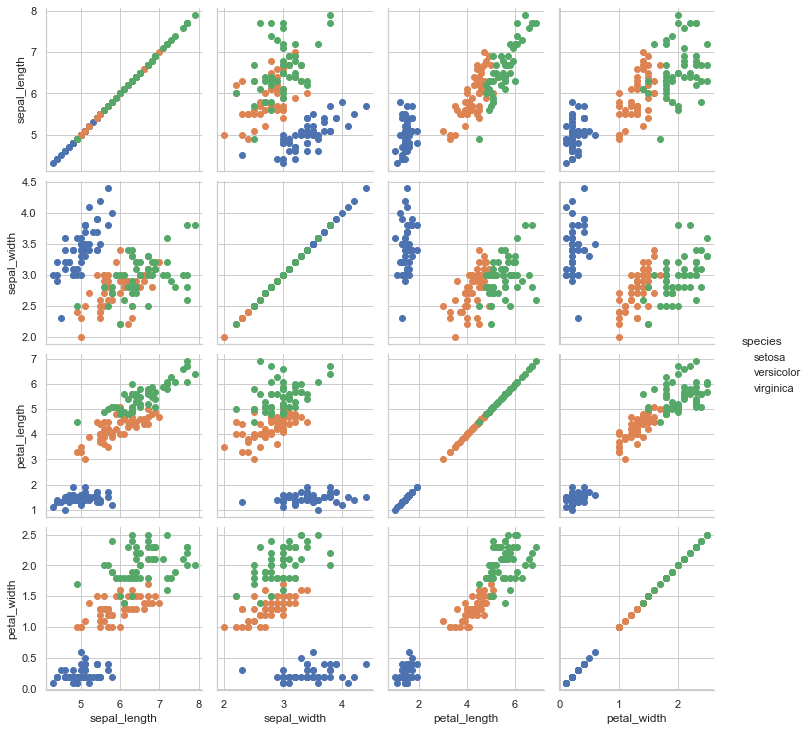

In [51]:
iris=sb.load_dataset("iris")
pg=sb.PairGrid(iris, hue="species")
pg.add_legend()
pg.map(plt.scatter)

<AxesSubplot:xlabel='year', ylabel='month'>

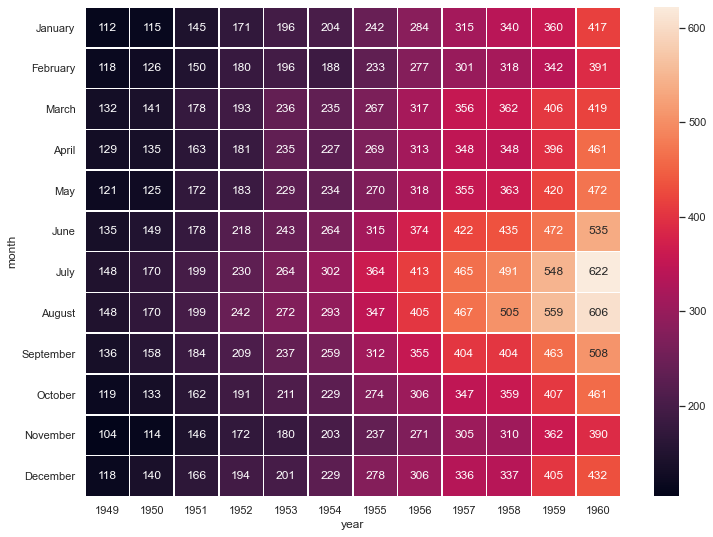

In [52]:
flights_long=sb.load_dataset("flights")
flights=flights_long.pivot("month","year","passengers")

f, ax= plt.subplots(figsize=(12,9))
sb.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)